In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from lbow.oneDimensional.steadystate import HalfPlaneModel
from helper_functions import effective_wavelength
from helper_functions import find_inclination_eta, find_inclination_w

In [3]:
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize']  = 16
mpl.rcParams['axes.titlesize']  = 16

# Produce figures 1-3

Copyright 2023 Dries Allaerts

Licensed under the Apache License, Version 2.0.

## Set-up

### Input parameters

Flow parameters: wind speed U and Brunt Vaisala frequency N

In [4]:
U0 = 0.5   # Wind speed [m/s]
U1 = 5     # Wind speed [m/s]
U2 = 15    # Wind speed [m/s]
N = 0.01   # Brunt-Vaisala frequency [1/s]

Hill shape $h\left(x\right) = \large\frac{h_{max}}{1+\left(\frac{x}{L}\right)^2}$


In [5]:
L = 1000.0   # Characteristic length scale of the hill (half width at half height) [m]
hmax = 100.0 # Height of the hill [m]

In [6]:
h = lambda x: hmax/(1+(x/L)**2) # Shape function of the hill

Froude number in case 1 and 2

In [7]:
Fr0 = U0/N/L
Fr1 = U1/N/L
Fr2 = U2/N/L
print('Froude number in case 0 is {}'.format(Fr0))
print('Froude number in case 1 is {}'.format(Fr1))
print('Froude number in case 2 is {}'.format(Fr2))

Froude number in case 0 is 0.05
Froude number in case 1 is 0.5
Froude number in case 2 is 1.5


Numerical parameters

In [8]:
Lx = 2000.0e3 # Length of the numerical domain [m]
Nx = int(2e4) # Number of grid points

Parameters for visualization

In [9]:
Lz = 10.7e3 # Height up to which solution is calculated [m]
Nz = 215    # Number of vertical levels to be used
print('Number of vertical levels is {} '.format(Nz))

Number of vertical levels is 215 


In [10]:
# Use different grid for case 0
Lz0 = 1.07e3 # Height up to which solution is calculated [m]
Nz0 = 215    # Number of vertical levels to be used
print('Number of vertical levels is {} '.format(Nz0))

Number of vertical levels is 215 


### Numerical grid

In [11]:
xs,dx = np.linspace(-Lx/2,Lx/2,Nx,endpoint=False,retstep=True)
print('Horizontal grid resolution is {} m'.format(dx))

Horizontal grid resolution is 100.0 m


In [12]:
zs,dz = np.linspace(0,Lz,Nz,retstep=True)
print('Vertical resolution is {} m'.format(dz))

Vertical resolution is 50.0 m


In [13]:
zs0,dz0 = np.linspace(0,Lz0,Nz0,retstep=True)
print('Vertical resolution is {} m'.format(dz0))

Vertical resolution is 5.0 m


### Model

In [14]:
model0 = HalfPlaneModel(xs,h(xs),U0,N)
model1 = HalfPlaneModel(xs,h(xs),U1,N)
model2 = HalfPlaneModel(xs,h(xs),U2,N)
modelh = HalfPlaneModel(xs,h(xs),U1,N,hydrostatic=True)

# Visualization

## Figure 1

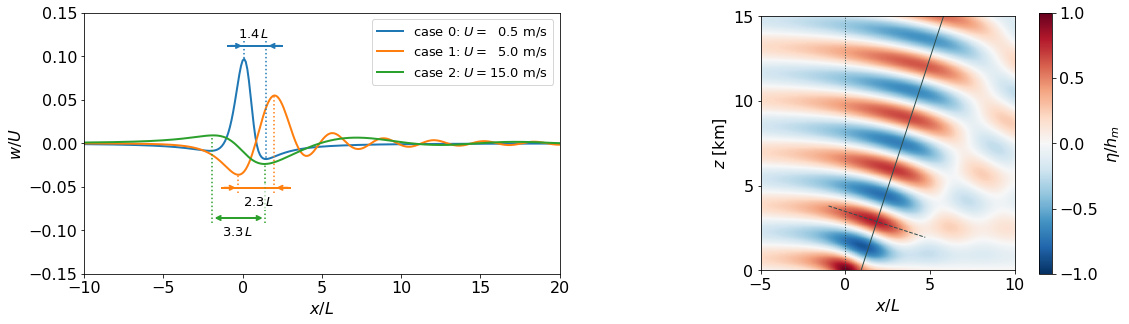

In [15]:
z = 1500
f,ax = plt.subplots(1,2,figsize=(18,4.8),gridspec_kw={'width_ratios': [1.45, 1]})
f.subplots_adjust(wspace=0.5)

# Left plot
w0 = model0.solve('w',z)
w1 = model1.solve('w',z)
w2 = model2.solve('w',z)
str0='{:>4.1f}'.format(U0)
str1='{:>4.1f}'.format(U1)
str2='{:>4.1f}'.format(U2)
ax[0].plot(xs/L,w0/U0,label='case 0: $U = $ '+f'{str0}'+r' m/s',lw=2)
ax[0].plot(xs/L,w1/U1,label='case 1: $U = $ '+f'{str1}'+r' m/s',lw=2) #s$^{-1}$
ax[0].plot(xs/L,w2/U2,label='case 2: $U = $'+f'{str2}'+r' m/s',lw=2)

#Annotate w0
x0 = xs[np.argmax(w0)]/L
y0 = np.max(w0)/U0+0.015
dx0 = np.abs(xs[np.argmin(w0)]-xs[np.argmax(w0)])/L
dy0 = (np.max(w0)-np.min(w0))/U0
ax[0].annotate("", xy=(x0, y0), xytext=(x0-1., y0),
            arrowprops=dict(arrowstyle="->",color=plt.cm.tab10(0),lw=2))
ax[0].annotate("", xy=(x0+dx0+1., y0), xytext=(x0+dx0, y0),
            arrowprops=dict(arrowstyle="<-",color=plt.cm.tab10(0),lw=2))
ax[0].plot([x0-1.,x0+dx0+1.],[y0,y0],'-',color=plt.cm.tab10(0),lw=2)
ax[0].plot([x0,x0],[y0+0.006,y0-0.015],':',color=plt.cm.tab10(0),lw=1.5)
ax[0].plot([x0+dx0,x0+dx0],[y0+0.006,y0-dy0-0.015],':',color=plt.cm.tab10(0),lw=1.5)
ax[0].annotate("${}\,L$".format(dx0), xy=(x0-0.4,y0+0.01),fontsize=13)

#Annotate w1
x1 = xs[np.argmin(w1)]/L
y1 = np.min(w1)/U1-0.015
dx1 = np.abs(xs[np.argmin(w1)]-xs[np.argmax(w1)])/L
dy1 = (np.max(w1)-np.min(w1))/U1
ax[0].annotate("", xy=(x1, y1), xytext=(x1-1, y1),
            arrowprops=dict(arrowstyle="->",color=plt.cm.tab10(1),lw=2))
ax[0].annotate("", xy=(x1+dx1+1, y1), xytext=(x1+dx1, y1),
            arrowprops=dict(arrowstyle="<-",color=plt.cm.tab10(1),lw=2))
ax[0].plot([x1-1,x1+dx1+1],[y1,y1],'-',color=plt.cm.tab10(1),lw=2)
ax[0].plot([x1,x1],[y1-0.006,y1+0.015],':',color=plt.cm.tab10(1),lw=1.5)
ax[0].plot([x1+dx1,x1+dx1],[y1-0.006,y1+dy1+0.015],':',color=plt.cm.tab10(1),lw=1.5)
ax[0].annotate("${}\,L$".format(dx1), xy=(x1+0.3,y1-0.02),fontsize=13)#,backgroundcolor='white')

#Annotate w2
x2 = xs[np.argmax(w2)]/L
y2 = np.max(w2)/U2-0.095
dx2 = np.abs(xs[np.argmin(w2)]-xs[np.argmax(w2)])/L
dy2 = (np.max(w2)-np.min(w2))/U2
ax[0].annotate("", xy=(x2, y2), xytext=(x2+dx2, y2),
            arrowprops=dict(arrowstyle="<->",color=plt.cm.tab10(2),lw=2))
ax[0].plot([x2,x2],[y2-0.006,y2+0.095],':',color=plt.cm.tab10(2),lw=1.5)
ax[0].plot([x2+dx2,x2+dx2],[y1+0.006,y2-dy2+0.095],':',color=plt.cm.tab10(2),lw=1.5)
ax[0].plot([x2+dx2,x2+dx2],[y1+0.006,y1-0.026],':',color=plt.cm.tab10(2),lw=1.5,alpha=0.4)
ax[0].plot([x2+dx2,x2+dx2],[y2-0.006,y1-0.026],':',color=plt.cm.tab10(2),lw=1.5)
ax[0].annotate("${}\,L$".format(dx2), xy=(x2+0.6,y2-0.02),fontsize=13)


ax[0].set_yticks([-0.15,-0.1,-0.05,0,0.05,0.1,0.15])
_ = ax[0].set(xlim=[-10,20],ylim=[-0.15,0.15],xlabel='$x/L$',ylabel='$w/U$')
ax[0].legend(fontsize=13)

#Right plot
z = np.linspace(0,15*L,Nz)
eta = model1.solve('eta',z)

im=ax[1].imshow(eta.T/hmax,
             origin='lower',
             extent=[xs[0]/L, xs[-1]/L, z[0]/L, z[-1]/L],
             aspect='equal',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.,vmin=-1,vmax=1))

_ = ax[1].set(xlim=[-5,10],
              ylim=[0,15],
              xlabel='$x/L$',
              ylabel='$z$ [km]',
              yticks=[0,5,10,15])
cbar = f.colorbar(im,ax=ax[1],shrink=1.0, pad=0.075,ticks=[-1,-0.5,0,0.5,1],
                 location='right')
cbar.set_label('$\eta/h_m$',labelpad=5)

# Plot inclination
phi_e, x1, z1 = find_inclination_eta(U1,N,L)
x = np.linspace(0,20)
ax[1].plot((1/np.tan(phi_e)*(z-z1)+x1)/L,z/L,color='darkslategrey',lw=1,linestyle='-')
ax[1].axvline(0,color='darkslategrey',linewidth=1,zorder=0,linestyle=':')

l=3
ax[1].plot([x1/L-l*np.sin(phi_e),x1/L+l*np.sin(phi_e)],[z1/L+l*np.cos(phi_e),z1/L-l*np.cos(phi_e)],
           color='darkslategrey',linestyle='--',linewidth=1)
    
plt.savefig(os.path.join('Figures','full_problemStatement.png'),bbox_inches='tight')
plt.savefig(os.path.join('Figures','full_problemStatement.pdf'),bbox_inches='tight')

## Figure 2

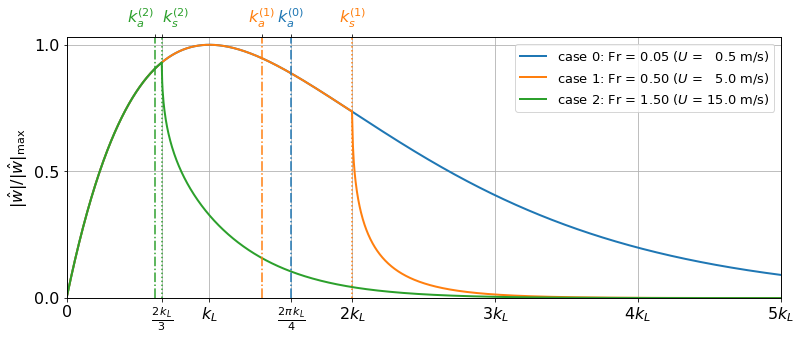

In [16]:
z = 1500
w0 = model0.solve('w',z)
w1 = model1.solve('w',z)
w2 = model2.solve('w',z)
wh = modelh.solve('w',z)
lambda0 = effective_wavelength(w0,dx)
lambda1 = effective_wavelength(w1,dx)
lambda2 = effective_wavelength(w2,dx)
lambdah = effective_wavelength(wh,dx)
k0 = 2*np.pi/lambda0
k1 = 2*np.pi/lambda1
k2 = 2*np.pi/lambda2
kh = 2*np.pi/lambdah

f,ax = plt.subplots(1,1,figsize=(12.8,4.8))

# We divide w by its theoretical maximum wmax = pi*hmax*U/e
wh = np.exp(1)*1j*L*modelh.k*np.exp(-L*modelh.k)*np.exp(1j*modelh.m*z) #modelh.solve('w',z,space='fourier')
w0 = np.exp(1)*1j*L*model0.k*np.exp(-L*model0.k)*np.exp(1j*model0.m*z) #model1.solve('w',z,space='fourier')
w1 = np.exp(1)*1j*L*model1.k*np.exp(-L*model1.k)*np.exp(1j*model1.m*z) #model1.solve('w',z,space='fourier')
w2 = np.exp(1)*1j*L*model2.k*np.exp(-L*model2.k)*np.exp(1j*model2.m*z) #model2.solve('w',z,space='fourier')

ax.plot(model0.k[1:]*L,np.abs(w0[1:]),label='case 0: Fr = {:>4.2f}'.format(U0/N/L)+' ($U$ =  {:>4.1f} m/s)'.format(U0),lw=2,c=plt.cm.tab10(0))
ax.plot(model1.k[1:]*L,np.abs(w1[1:]),label='case 1: Fr = {:>4.2f}'.format(U1/N/L)+' ($U$ =  {:>4.1f} m/s)'.format(U1),lw=2,c=plt.cm.tab10(1))
ax.plot(model2.k[1:]*L,np.abs(w2[1:]),label='case 2: Fr = {:>4.2f}'.format(U2/N/L)+' ($U$ = {:>4.1f} m/s)'.format(U2),lw=2,c=plt.cm.tab10(2))


ax.axvline(N*L/U1,ls=':',c=plt.cm.tab10(1))
ax.axvline(k1*L,ls='-.',c=plt.cm.tab10(1))
ax.axvline(k0*L,ls='-.',c=plt.cm.tab10(0))

ax.axvline(N*L/U2,ls=':',c=plt.cm.tab10(2))
ax.axvline(k2*L,ls='-.',c=plt.cm.tab10(2))


_ = ax.set(xlim=[0,5],ylim=[0,1.03],ylabel='$|\hat{w}|/|\hat{w}|_{\max}$',
          xticks=[0,2/3,1,np.pi/2,2,3,4,5],
           xticklabels=['0',r'$\frac{2 \,k_L}{3}$',r'$k_L$',r'$\frac{2 \pi \,k_L}{4}$',r'$2k_L$',r'$3k_L$',r'$4k_L$',r'$5k_L$'],
           yticks=[0,0.5,1])
ax.legend(fontsize=13)
ax.grid('on')

ax2 = ax.twiny()
_ = ax2.set(xlim=ax.get_xlim(),
            xticks=[k2*L,N*L/U2,k1*L,kh*L,N*L/U1],
            xticklabels=['$k_a^{(2)}$','$k_s^{(2)}$','$k_a^{(1)}$','$k_{a}^{(0)}$','$k_s^{(1)}$'])
ax2.xaxis.get_majorticklabels()[0].set_horizontalalignment("right")
ax2.xaxis.get_majorticklabels()[1].set_horizontalalignment("left")
ax2.xaxis.get_ticklabels()[0].set_color(plt.cm.tab10(2))
ax2.xaxis.get_ticklabels()[1].set_color(plt.cm.tab10(2))
ax2.xaxis.get_ticklabels()[2].set_color(plt.cm.tab10(1))
ax2.xaxis.get_ticklabels()[3].set_color(plt.cm.tab10(0))
ax2.xaxis.get_ticklabels()[4].set_color(plt.cm.tab10(1))

plt.savefig(os.path.join('Figures','waveSpectrum.png'),bbox_inches='tight')
plt.savefig(os.path.join('Figures','waveSpectrum.pdf'),bbox_inches='tight')

## Figure 3

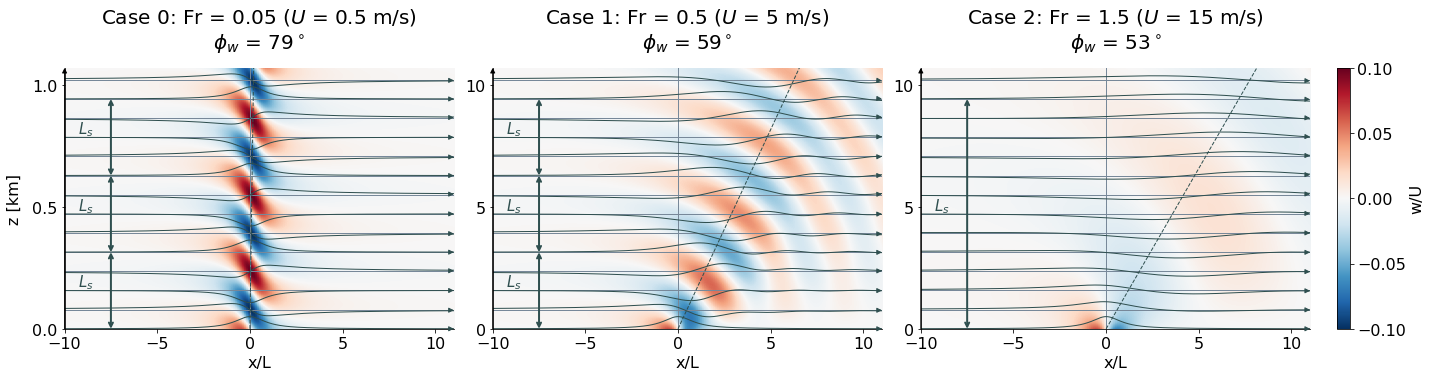

In [17]:
f,ax = plt.subplots(1,3,figsize=(24,4.8))

f.subplots_adjust(wspace=0.1)

# Grid for streamlines
Lz_s = 1.5*2*np.pi*np.max([U1/N,U2/N]) # Height up to which solution is calculated [m]
Nz_s = int(1.5 * 12 +1)                # Number of vertical levels to be used
zs_s = np.linspace(0,Lz_s,Nz_s)
Lz0_s = 1.5*2*np.pi*np.max([U1/N,U2/N])/10
Nz0_s = int(1.5 * 12 +1)
zs0_s = np.linspace(0,Lz0_s,Nz0_s)

def plot_2Dcontour(model,U,index):
    # Use 1/10 of vertical scale for case 0, so some case 0 uses slightly different parameters
    if index == 0:
        z = zs0        # Vertical grid for solving w
        z_s = zs0_s    # Vertical grid for solving eta
        scale = 1     # Vertical scaling
    else:
        z = zs
        z_s = zs_s
        scale = 10
        
    # Calculate flow field
    w = model.solve('w',z)
    
    # Plot 2D contour
    im=ax[index].imshow(w.T/U,
                    origin='lower',
                    extent=[xs[0]/L, xs[-1]/L, z[0]/L, z[-1]/L],
                    aspect='auto',
                    cmap='RdBu_r', #'seismic',
                    norm=TwoSlopeNorm(vcenter=0.,vmin=-0.1,vmax=0.1))

    # figure mark-up
    _ = ax[index].set(xlim=[-10,11],ylim=[0,z[-1]/L],xlabel='x/L',yticks=[0,np.floor(z[-1]/L)/2,np.floor(z[-1]/L)])
    ax[index].spines['top'].set_visible(False)
    ax[index].spines['right'].set_visible(False)
    
    # Add y label and colorbar on left and right
    if index == 0:
        _ = ax[index].set_ylabel('z [km]',labelpad=10)
    if index == 2:
        cbar = f.colorbar(im,ax=ax[:],shrink=1.0,fraction=0.05, pad=0.02,label='w/U',ticks=[-0.1,-0.05,0,0.05,0.1])
        
    # Add streamlines (vertical displacement scaled by a factor 5 or 0,5 (case 0) for visibility)
    eta = model.solve('eta',z_s)
    for kz in range(0,14,1):
        ax[index].plot(xs/L,scale*0.5*eta[:,kz]/L+z_s[kz]/L,'darkslategrey',linewidth=1)
        ax[index].axhline(z_s[kz]/L,color='lightslategray',linewidth=1,zorder=0)
        #Arrows for streamlines
        iend = np.where(xs/L>=21)[0][0]
        ax[index].annotate("", xy=(11,scale*0.5*eta[iend,kz]/L+z_s[kz]/L), xytext=(10.9,scale*0.5*eta[iend-1,kz]/L+z_s[kz]/L),
                       arrowprops=dict(arrowstyle="-|>",color='darkslategrey',lw=1))
    ax[index].axvline(0,color='lightslategray',linewidth=1,zorder=0)
    ax[index].annotate("", xy=(-10,scale*1.07), xytext=(-10,0),
                   arrowprops=dict(arrowstyle="-|>",shrinkA=0,shrinkB=0,color='k',lw=1))
    
    # Show vertical length scale
    if index == 2:
        count = 1
    else:
        count = 3
        
    for i in range(count):
        ax[index].annotate("", xy=(-7.5, i*2*np.pi*U/N/1e3), xytext=(-7.5, (i+1)*2*np.pi*U/N/1e3),
                           arrowprops=dict(arrowstyle="<->",shrinkA=0,shrinkB=0,color='darkslategrey',lw=2))
        ax[index].annotate("$L_s$", xy=(-9.3,(2*i+1)*np.pi*U/N/1e3+scale*0.015),fontsize=15,color='darkslategrey')
        
    # Plot inclination
    phi_e, x1, z1 = find_inclination_eta(U,N,L)
    phi_w = find_inclination_w(U,N,L,z1=z1)
    x = np.linspace(0,20)
    ax[index].plot(x,np.tan(phi_w)*x,color='darkslategrey',lw=1,linestyle='--')
    
    # Figure title
    title = 'Case {}: Fr = {}'.format(index, U/N/L)+' ($U$ = {} m/s)'.format(U)
    subtitle = r'$\phi_w$ = {:2.0f}$^\circ$'.format(np.rad2deg(phi_w))
    _ = ax[index].set_title(title+'\n'+subtitle,
                            pad=20,fontsize=20)


# Plot all cases
plot_2Dcontour(model0,U0,0)
plot_2Dcontour(model1,U1,1)
plot_2Dcontour(model2,U2,2)

plt.savefig(os.path.join('Figures','2Dcontour.png'),bbox_inches='tight')
plt.savefig(os.path.join('Figures','2Dcontour.pdf'),bbox_inches='tight')